In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import *
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
sns.set_style("darkgrid")

Certainly! Scikit-learn offers a wide range of models for various machine learning tasks. Here are some of the key models available:

### **Supervised Learning**
#### **Linear Models**
- **Ordinary Least Squares (OLS)**
- **Ridge Regression**
- **Lasso**
- **Elastic-Net**
- **Least Angle Regression (LARS)**
- **Orthogonal Matching Pursuit (OMP)**
- **Bayesian Regression**
- **Logistic Regression**
- **Stochastic Gradient Descent (SGD)**
- **Perceptron**
- **Passive Aggressive Algorithms**

#### **Support Vector Machines (SVM)**
- **SVM for Classification**
- **SVM for Regression**

#### **Nearest Neighbors**
- **K-Nearest Neighbors (KNN)**
- **Radius Neighbors**
- **Nearest Centroid**

#### **Decision Trees and Ensembles**
- **Decision Trees**
- **Random Forests**
- **Gradient Boosting**
- **AdaBoost**
- **Bagging**
- **Voting Classifier**
- **Stacking**

#### **Naive Bayes**
- **Gaussian Naive Bayes**
- **Multinomial Naive Bayes**
- **Bernoulli Naive Bayes**
- **Complement Naive Bayes**

#### **Discriminant Analysis**
- **Linear Discriminant Analysis (LDA)**
- **Quadratic Discriminant Analysis (QDA)**

#### **Gaussian Processes**
- **Gaussian Process Regression (GPR)**
- **Gaussian Process Classification (GPC)**

### **Unsupervised Learning**
#### **Clustering**
- **K-Means**
- **Agglomerative Clustering**
- **DBSCAN**
- **Mean Shift**
- **Spectral Clustering**

#### **Dimensionality Reduction**
- **Principal Component Analysis (PCA)**
- **Kernel PCA**
- **Factor Analysis**
- **Independent Component Analysis (ICA)**
- **Latent Dirichlet Allocation (LDA)**

#### **Manifold Learning**
- **Isomap**
- **Locally Linear Embedding (LLE)**
- **t-SNE**

### **Model Selection and Evaluation**
- **Grid Search**
- **Randomized Search**
- **Cross-Validation**

These models cover a broad spectrum of machine learning tasks, from regression and classification to clustering and dimensionality reduction¹²³.

Is there a specific type of model or task you're interested in exploring further?

Source: Conversation with Copilot, 18/07/2024
(1) 1. Supervised learning — scikit-learn 1.5.1 documentation. https://scikit-learn.org/stable/supervised_learning.html.
(2) Comprehensive Guide to Classification Models in Scikit-Learn. https://www.geeksforgeeks.org/comprehensive-guide-to-classification-models-in-scikit-learn/.
(3) Models - ScikitLearn.jl - Read the Docs. https://scikitlearnjl.readthedocs.io/en/latest/models/.
(4) Overview of Classification Methods in Python with Scikit-Learn. https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/.
(5) Sklearn Regression Models : Methods and Categories | Sklearn Tutorial. https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-regression-models.

# DATA COLLECTION

In [31]:
dataset=pd.read_csv(r"C:\Users\owner\Downloads\archive (11)\Advertising_Data.csv")
dataset.head()
check=dataset.copy()

# DATA CLEANING

## checKing for null in dataset

In [32]:
print(f'general check for nall in dataset= {dataset.isnull().values.any()}')
print(f"colum check for null in dataset=\n{dataset.isnull().any()}")
print(f"numbers of null value in each colums=\n{dataset.isnull().sum()}")
print(f"rows with null values=\n{dataset[dataset.isnull().any(axis=1)]}")

#in case there is any null value option include
#  1. from sklearn.impute import SimpleImputer
#        imputer= SimpleImputer(strategy="mean") strategy can “median”,“most_frequent”,“constant”
#        dataset=imputer.fit_transform(dataset)
#  2. k-Nearest Neighbour for complex dataset

general check for nall in dataset= False
colum check for null in dataset=
TV                      False
Billboards              False
Google_Ads              False
Social_Media            False
Influencer_Marketing    False
Affiliate_Marketing     False
Product_Sold            False
dtype: bool
numbers of null value in each colums=
TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64
rows with null values=
Empty DataFrame
Columns: [TV, Billboards, Google_Ads, Social_Media, Influencer_Marketing, Affiliate_Marketing, Product_Sold]
Index: []


## checking for duplicate rows

In [33]:
print(f"general check for duplicated row={dataset.duplicated().values.any()}")
print(f"number of duplicated rows={dataset.duplicated().sum()}")

#in case there is any duplicated fix by
#  dataset= dataset.drop_duplicate()

general check for duplicated row=False
number of duplicated rows=0


# DATA EXPLOIRATION

## checking basic statistics

In [34]:
check.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

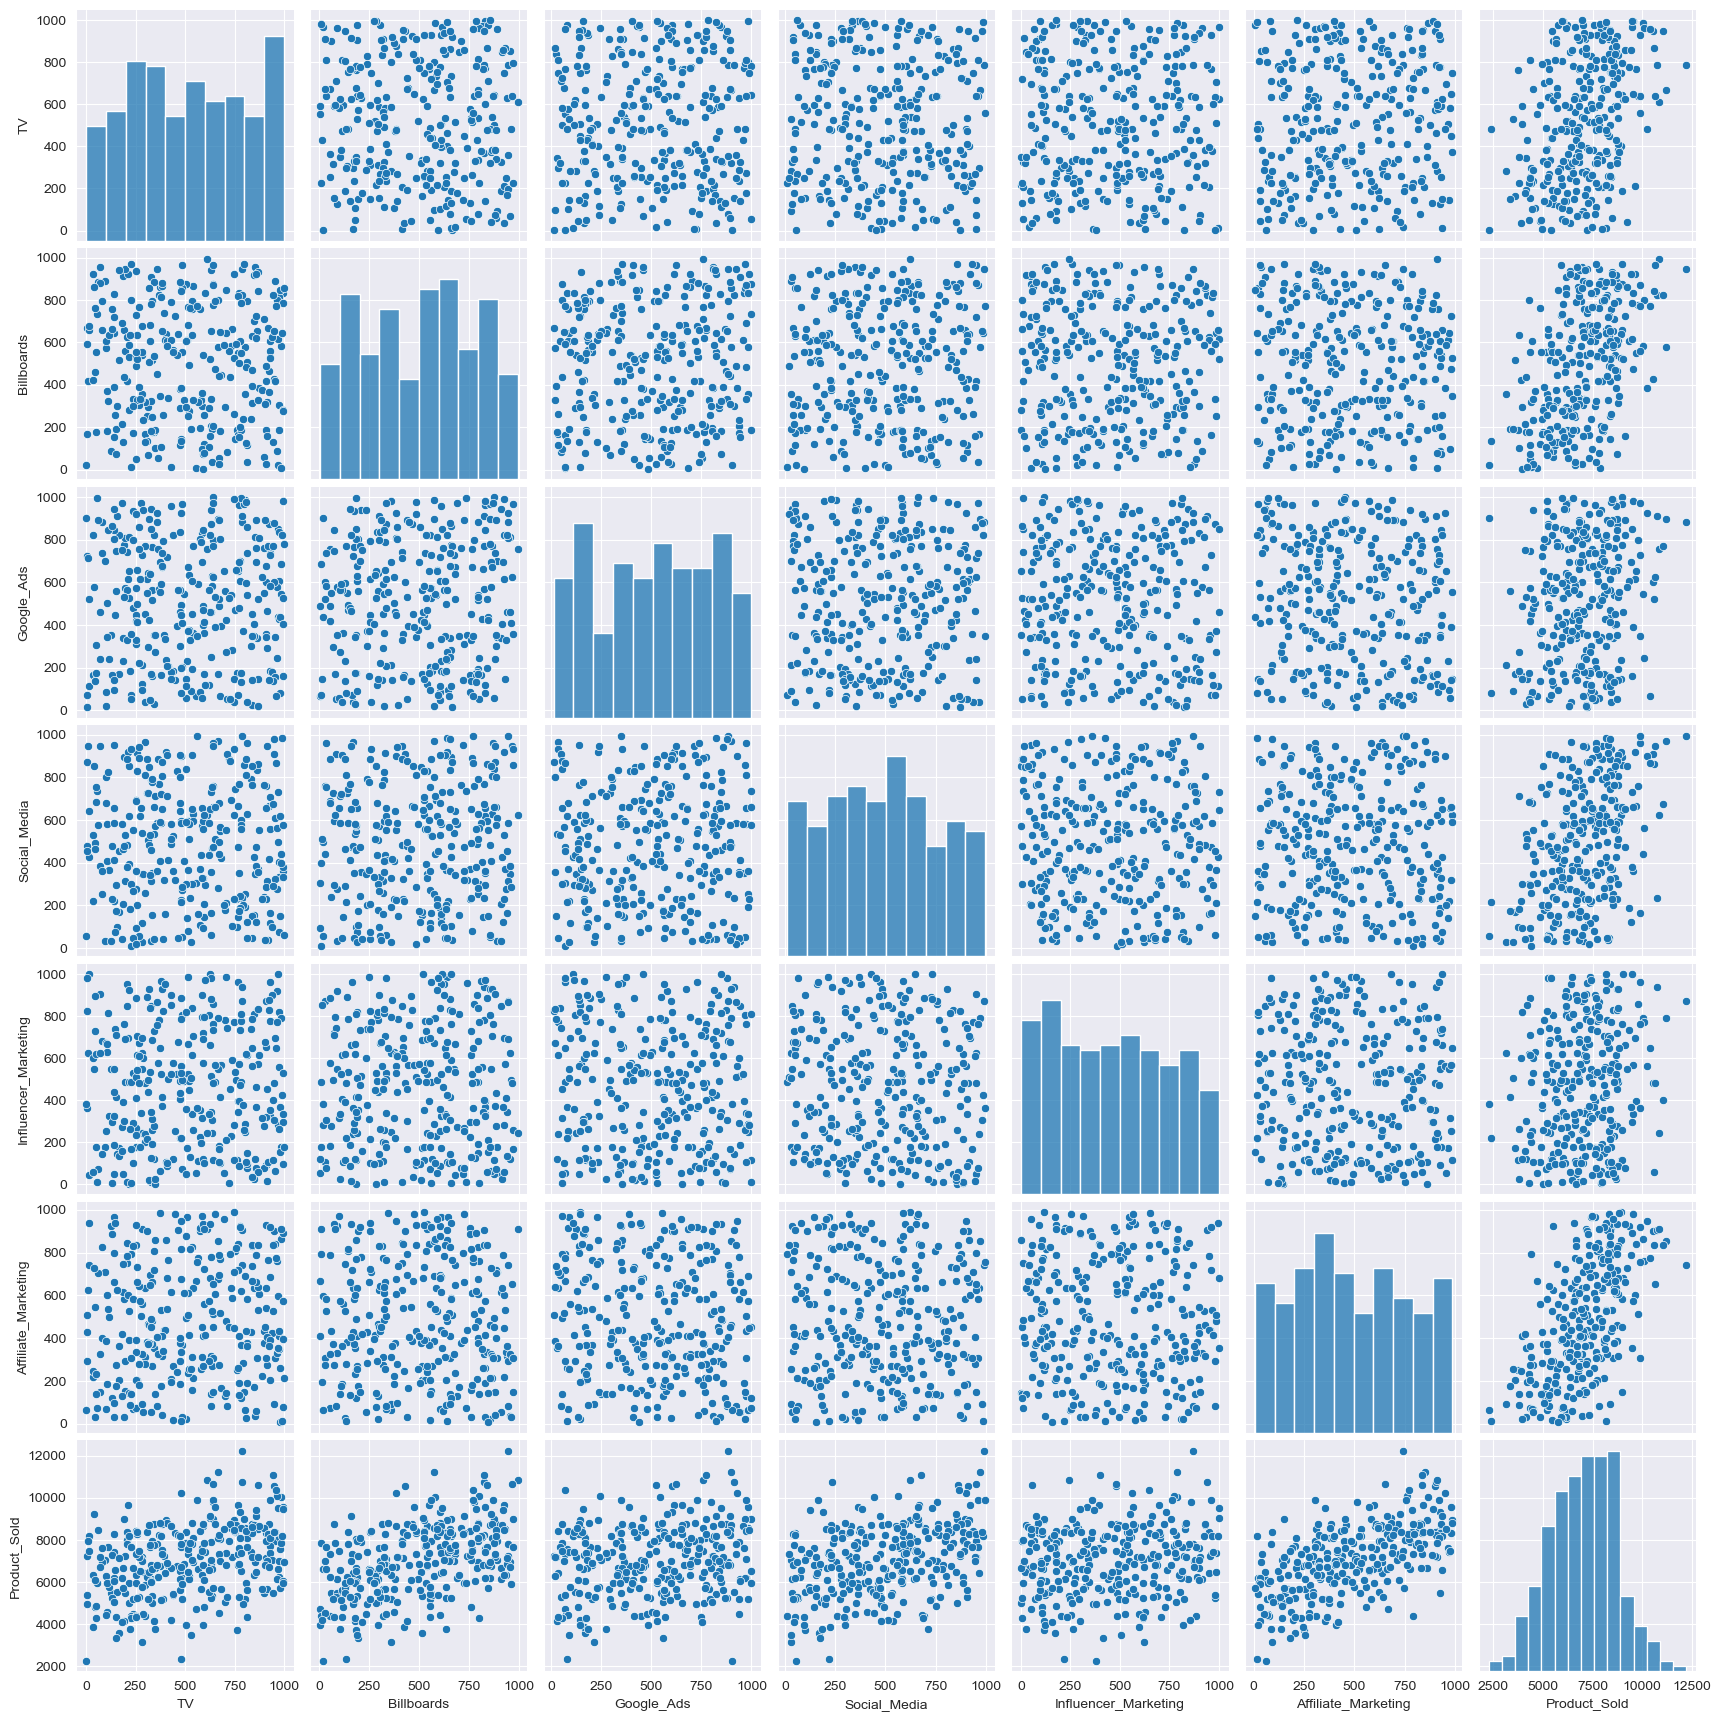

In [35]:
# Scatter plots
sns.pairplot(check)
plt.show()

### dataset against target shows more linear relationship but not evenly spread out on the target 

# HANDLING OUTLIERS

## checking and viewing outliers

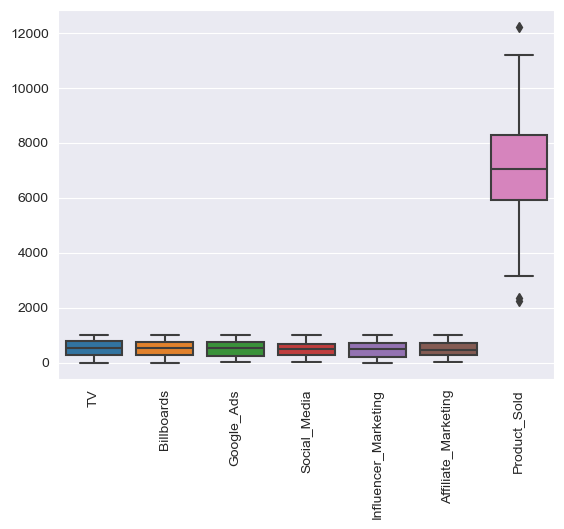

In [36]:
ax=sns.boxplot(data=check)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### one outlier has been detected in the Product_Sold column deu to wider range of the distribution of the column

### the outlier is not much pronounced so we just transform it to make it more compact

note we scale the input having the model in mind so that the end product favours our model

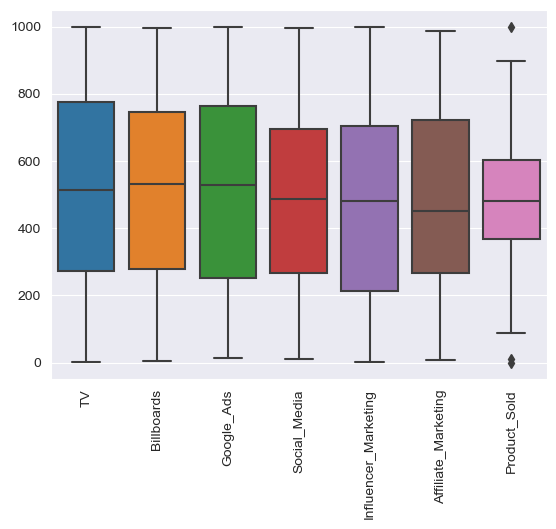

In [37]:
scale=MinMaxScaler(feature_range=(0,1000))
check['Product_Sold']=scale.fit_transform(check[['Product_Sold']])
ax=sns.boxplot(check)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

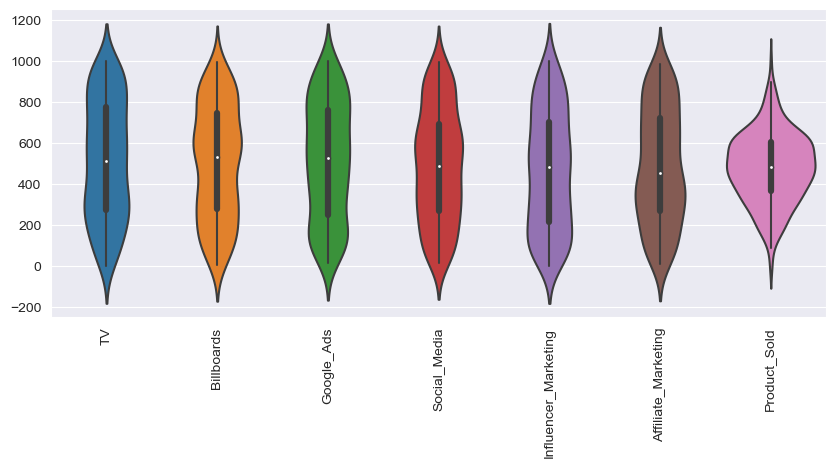

In [38]:
plt.figure(figsize=(10,4))
ax=sns.violinplot(data=check)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Transforming the target variable to its logarithmic values can sometimes make certain data points appear as outliers, especially if the original data has a wide range of values. This happens because the log transformation compresses the scale of large values more than small values, which can highlight differences that were less noticeable before. Re-evaluate the Transformation: Ensure that the log transformation is appropriate for your data. Sometimes, other transformations like square root or Box-Cox might be more suitable.

In [39]:
#dataset['Product_Sold_log']=np.log(dataset['Product_Sold'])
#dataset['Product_Sold_sqrt']=np.sqrt(dataset['Product_Sold'])
#dataset['Product_Sold_boxcox'], fitted=stats.boxcox(dataset['Product_Sold'])
check.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,478.784444
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,170.908402
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,0.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,367.526083
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,480.738363
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,603.832263
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,1000.000000


# FEATURE ENGINEERING

## checking for multicollinearity

In [40]:
check.corr()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
TV,1.000000,-0.028851,0.025265,-0.038993,0.009970,0.087524,0.374228
Billboards,-0.028851,1.000000,0.052991,0.048722,-0.005815,-0.041060,0.480593
Google_Ads,0.025265,0.052991,1.000000,0.040265,-0.059243,-0.131834,0.203678
Social_Media,-0.038993,0.048722,0.040265,1.000000,-0.042679,-0.019522,0.401088
Influencer_Marketing,0.009970,-0.005815,-0.059243,-0.042679,1.000000,-0.047093,0.140844
Affiliate_Marketing,0.087524,-0.041060,-0.131834,-0.019522,-0.047093,1.000000,0.611603
Product_Sold,0.374228,0.480593,0.203678,0.401088,0.140844,0.611603,1.000000


# SPLITING DATASET

In [41]:
target=dataset['Product_Sold']
predictor=dataset.drop('Product_Sold', axis=1)
x_dataset=predictor.to_numpy()
y_dataset=target.to_numpy().reshape(-1,1)
x_dataset.shape, y_dataset.shape

((300, 6), (300, 1))

In [42]:
x_train, x_test, y_train, y_test= train_test_split(x_dataset, y_dataset, test_size=0.4)

In [43]:
x_dev, x_tst, y_dev, y_tst=train_test_split(x_test, y_test, test_size=0.5)

In [44]:
Xscaler=StandardScaler()
Yscaler=MinMaxScaler(feature_range=(0,1000))
Xscaler.fit(x_train)
Yscaler.fit(y_train)

x_train_sc=Xscaler.transform(x_train)
x_dev_sc=Xscaler.transform(x_dev)
y_train_sc=Yscaler.transform(y_train)
y_dev_sc=Yscaler.transform(y_dev)


In [45]:
def linear_model_check(xtrain, ytrain):
    '''this function compare all linear model in scikit learn'''
    model_check={"Model Name":[],"Model MSE %":[]}
    model_list=[LinearRegression, 
                Ridge,
                Lasso,
                ElasticNet,
                Lars,
                LassoLars,
                OrthogonalMatchingPursuit,
                BayesianRidge,
                ARDRegression,
                SGDRegressor,
                PassiveAggressiveRegressor,
                RANSACRegressor,
                TheilSenRegressor,
                HuberRegressor]
    for i in range(len(model_list)):
        model_check['Model Name'].append(str(model_list[i]).split('.')[-1])
        model_obj=model_list[i]()
        model_obj.fit(xtrain, ytrain)
        ypred=model_obj.predict(xtrain)
        mse=mean_squared_error(ytrain, ypred)
        mse=np.round(mse,2)
        model_check['Model MSE %'].append(mse)
    return pd.DataFrame(model_check)



In [46]:
result=linear_model_check(x_train_sc,y_train_sc)
result

C:\Users\owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,Model Name,Model MSE %
0,LinearRegression'>,1.35
1,Ridge'>,2.52
2,Lasso'>,7.42
3,ElasticNet'>,4314.50
4,Lars'>,1.35
5,LassoLars'>,7.42
6,OrthogonalMatchingPursuit'>,22502.18
7,BayesianRidge'>,1.35
8,ARDRegression'>,1.35
9,SGDRegressor'>,1.35


### we pick LinearRegression has the model to finetune

In [47]:
advert=LinearRegression()
advert.fit(x_train_sc, y_train_sc)
y_pred=advert.predict(x_train_sc)
mse=mean_squared_error(y_train_sc, y_pred)
mse

1.3478797952554116

# OPTIMIZING MODEL

In [48]:
y_dev_pred=advert.predict(x_dev_sc)
dev_mse=mean_squared_error(y_dev_sc, y_dev_pred)
dev_mse

1.362345736777055

### train = 1.06, dev = 1.21
### this two are high, and its showing that model is under fitting real world senerio

In [49]:
def complexity_check(x_train, y_train, x_dev, y_dev):
    train_err=[]
    dev_err=[]
    power=[]
    for deg in range(1,10):
        power.append(deg)
        model_power=PolynomialFeatures(deg, include_bias=False)
        xscaler=StandardScaler()
        
        model_power.fit(x_train)
        x_train_pwd=model_power.transform(x_train)
        xscaler.fit(x_train_pwd)
        
        xtrain_pwd=xscaler.transform(x_train_pwd)
        
        yscaler=MinMaxScaler(feature_range=(0,1000))
        yscaler.fit(y_train)

        ytrain=yscaler.transform(y_train)
        
        xdev=model_power.transform(x_dev)
        xdev=xscaler.transform(xdev)
        ydev=yscaler.transform(y_dev)
        
        model=LinearRegression()
        model.fit(xtrain_pwd, ytrain)
        
        ypred=model.predict(xtrain_pwd)
        mse_train=mean_squared_error(ytrain, ypred)
        train_err.append(mse_train)
        
        ydev_pred=model.predict(xdev)
        mse_dev=mean_squared_error(ydev, ydev_pred)
        dev_err.append(mse_dev)
        
    complex_check=pd.DataFrame({'Degree':power, 'Train_Error': train_err, 'Development_Error': dev_err})
    plt.figure(figsize=(10,6))
    sns.lineplot(complex_check, x='Degree', y='Train_Error', label='Train_Error')
    sns.lineplot(complex_check, x='Degree', y='Development_Error', label='Development_Error')
    plt.xlabel('Polynomia Degree')
    plt.ylabel('Mean Squared Error')
    plt.title('Model Complexity Check')
               
    plt.legend()
    plt.ylim(0.001,10)
    plt.tight_layout()
    plt.show()
    return complex_check
        
        
    

C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

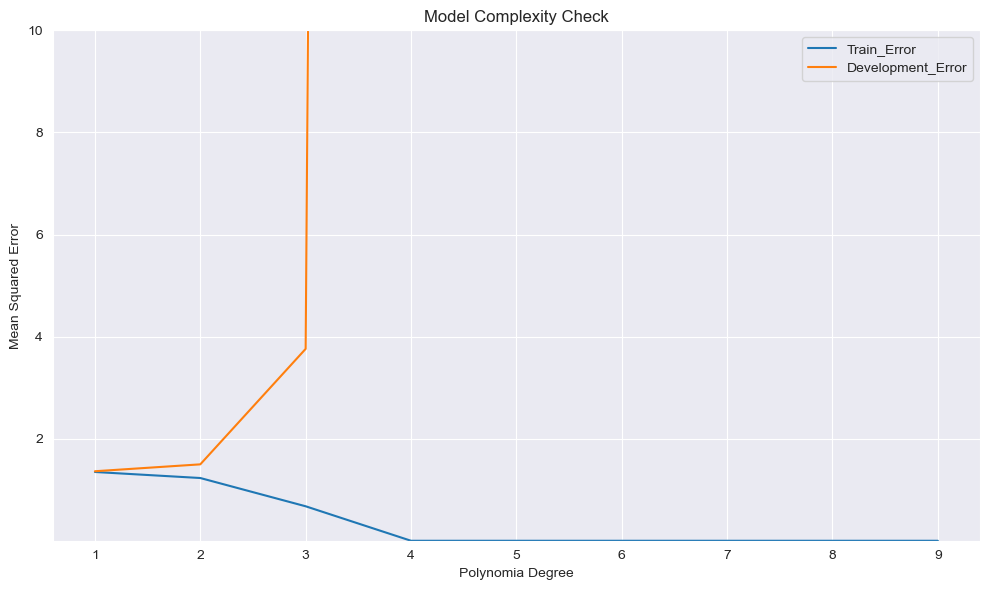

In [50]:
com_check=complexity_check(x_train, y_train, x_dev, y_dev)

In [51]:
com_check

,Degree,Train_Error,Development_Error
0,1,1.347880e+00,1.362346
1,2,1.229666e+00,1.497490
2,3,6.757606e-01,3.760228
3,4,5.482405e-25,284.768821
4,5,1.786660e-24,189.817507
5,6,1.722521e-24,479.458884
6,7,3.979532e-24,1744.788522
7,8,5.526170e-24,6170.345043
8,9,4.957142e-24,19375.897776


### from the graph we stick to our 1 degree polynomial
### trying out regularization decrease since we have a biase case

trying out Ridge with alpha lower than 0 

In [52]:
def reg_check(x_train, y_train, x_dev, y_dev):
    model_alpha=[]
    train_err=[]
    dev_err=[]
    xscaler=StandardScaler()
    xscaler.fit(x_train)
    xtrain_sc=xscaler.transform(x_train)
    xdev_sc=xscaler.transform(x_dev)
    
    yscaler=MinMaxScaler(feature_range=(0,1000))
    yscaler.fit(y_train)
    ytrain_sc=yscaler.transform(y_train)
    ydev_sc=yscaler.transform(y_dev)
    for i in np.arange(0.0001,1,0.05):
        model_alpha.append(i)
        model=Ridge(alpha=i)
        model.fit(xtrain_sc,ytrain_sc)
        ypred=model.predict(xtrain_sc)
        mse_train=mean_squared_error(ytrain_sc,ypred)
        train_err.append(mse_train)
        ypred_dev=model.predict(xdev_sc)
        mse_dev=mean_squared_error(ydev_sc,ypred_dev)
        dev_err.append(mse_dev)
    regulate=pd.DataFrame({'Alpha':model_alpha, 'Train err':train_err, 'Dev err':dev_err})
    sns.lineplot(regulate, x='Alpha', y='Train err', label= 'Train err')
    sns.lineplot(regulate, x='Alpha', y='Dev err', label='Dev err')
    plt.legend()
    plt.ylabel('mean squared error')
    plt.xlabel('alpha')
    plt.title('Regularization Check')
    plt.show()
    return regulate
        

C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

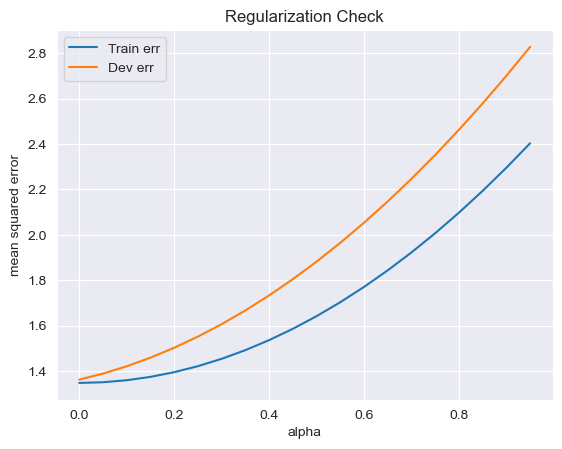

In [53]:
regulate=reg_check(x_train, y_train, x_dev, y_dev)

### its like there is no possible further tuning although we can still try using interaction terms amist the feature but we won,t do that here

going with our simple linear model and finally we test it on our test set and the we retrain the model with the whole dataset that we have

In [54]:
xtst_sc=Xscaler.transform(x_tst)
ytst_sc=Yscaler.transform(y_tst)
ypred_tst=advert.predict(xtst_sc)
error=mean_squared_error(ytst_sc, ypred_tst)
error

1.1733310915182205

In [55]:
ypred_tst[:8]

array([[753.06337518],
       [572.95050297],
       [432.0177501 ],
       [684.46799545],
       [674.62771252],
       [443.79830154],
       [287.2529801 ],
       [596.68009526]])

In [56]:
ypred_tst_back=Yscaler.inverse_transform(ypred_tst)
ypred_tst_back[:8]

array([[8999.67027127],
       [7387.47995206],
       [6125.99088116],
       [8385.67302726],
       [8297.5926548 ],
       [6231.43859709],
       [4830.20142492],
       [7599.88353269]])

In [57]:
y_tst[:8]

array([[9011.],
       [7395.],
       [6136.],
       [8387.],
       [8297.],
       [6238.],
       [4830.],
       [7584.]])

In [ ]:
import joblib
model = joblib.load('Advert_model.pkl')


def preprocess_info():
    info={'TV':TV,
       'Billboards':Billboards,	
       'Google_Ads':Google_Ads,
       'Social_Media':Social_Media,	
       'Influencer_Marketing':Influencer_Marketing,	
       'Affiliate_Marketing':Affiliate_Marketing
      }
    					
    info=pd.DataFrame(info, index=[0])
    predictor=info.to_numpy()
    return predictor

# Load the scaler_list and scaler_yr from files
Xscaler = joblib.load('Xscaler_Advert.pkl')
Yscaler = joblib.load('Yscaler_Advert.pkl')
model=joblib.load('Advert_model.pkl')

def preprocess_test(xtest, Xscaler):
    return Xscaler.transform(xtest)

prediction=advert.predict(A)

prediction=Yscaler.inverse_transform(prediction)
